# QVC Analysis 
 - Clustering 전처리 과정은 Jupyter 메모리상 중간에 되지를 않게 되어 .R 내용을 확인 
 - <a href="3. Clustering.R"> Clustering </a>

### 필요한 파일.
- Customer master2.csv
- order_data.csv
- product.csv
- timezone.csv
- zipcode.csv
- Product airtime.csv
- pre_order_data.csv
-  *.txt 파일

In [4]:
library(stringr)
library(arules)
library(dplyr)
library(maps)
library(ggplot2)
library(ggmap)
library(gridExtra)
library(reshape2)
library(arulesSequences)
library(lubridate)

In [22]:
theme_set(theme_gray(base_size = 13))

## Data Load

In [6]:
customer <- read.csv("data/Customer master2.csv")
customer$SHOPPER_SEGMENT_CODE <- as.factor(customer$SHOPPER_SEGMENT_CODE)

In [7]:
order_df <- read.csv("data/order_data.csv", stringsAsFactors = F)
order_df$SHOPPER_SEGMENT_CODE[is.na(order_df$SHOPPER_SEGMENT_CODE)] <- 0
order_df$SHOPPER_SEGMENT_CODE <- as.factor(order_df$SHOPPER_SEGMENT_CODE)

In [9]:
zip <- read.csv("data/zipcode.csv", stringsAsFactors = F)

# Data 확인. 

## 1. 고객 분포도. Zip Code 별 고객 분포도.

In [10]:
v_customer <- customer %>% group_by(ZIP_CODE) %>% summarize(cnt = n()) %>% filter(cnt > 5)
v_customer <- merge(v_customer,zip[,c(1,3:5)],by.x="ZIP_CODE",by.y="zip")

In [12]:
head(v_customer)

,ZIP_CODE,cnt,state,latitude,longitude
1,1001,8,MA,42.07061,-72.62029
2,1007,6,MA,42.278424,-72.411
3,1013,9,MA,42.161492,-72.60316
4,1020,9,MA,42.175992,-72.57265
5,1027,6,MA,42.27279,-72.68677
6,1028,8,MA,42.066795,-72.5102


### 지도 그리기

In [14]:
options(repr.plot.width=5, repr.plot.height=5)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=united+states&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=united%20states&sensor=false


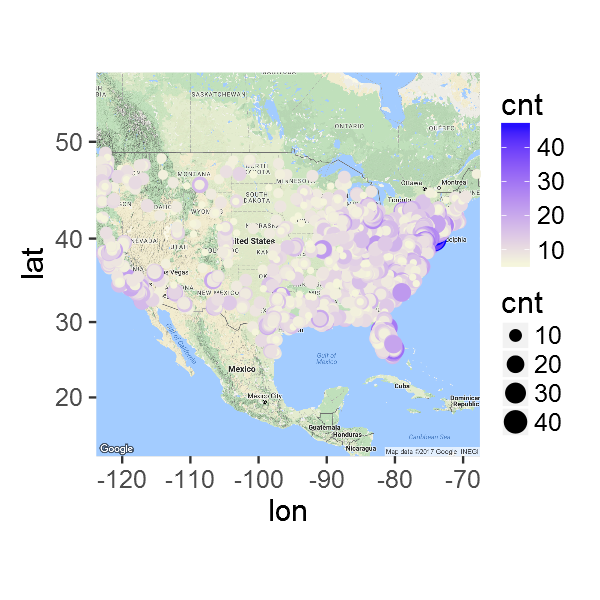

In [15]:
map<-get_map(location='united states', zoom=4, maptype = "terrain",
             source='google',color='color')

ggmap(map) + geom_point(
  aes(x=longitude, y=latitude, show_guide = TRUE, colour=cnt, size=cnt),
  data=v_customer, alpha=1,na.rm = T)  +
  scale_color_gradient(low="beige", high="blue")

### 지도그리기 2 

In [17]:
options(repr.plot.width=5, repr.plot.height=3)

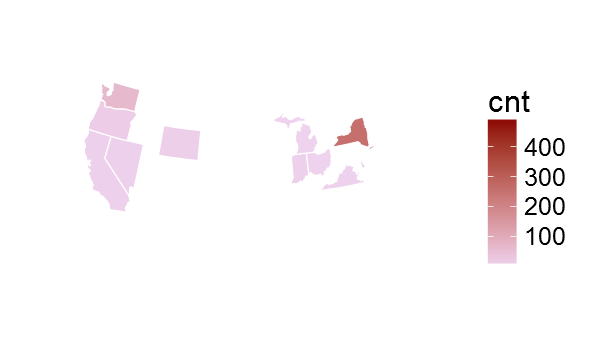

In [18]:
us <- map_data("state")
city <- customer %>% group_by(city) %>% summarize(cnt = n())
city <- city %>% mutate(avg = cnt/mean(cnt))
city$city <- tolower(city$city)

gg <- ggplot()
gg <- gg + geom_map(data=us, map=us,
                    aes(x=long, y=lat, map_id=region),
                    fill="#ffffff", color="#ffffff", size=0.25)

gg <- gg + geom_map(data=city, map=us,
                    aes(fill=cnt, map_id=city),
                    color="#ffffff", size=0.25)
gg <- gg + scale_fill_continuous(low='thistle2', high='darkred', 
                                 guide='colorbar')
gg <- gg + labs(x=NULL, y=NULL)
gg <- gg + coord_map("albers", lat0 = 39, lat1 = 45) 
gg <- gg + theme(panel.border = element_blank())
gg <- gg + theme(panel.background = element_blank())
gg <- gg + theme(axis.ticks = element_blank())
gg <- gg + theme(axis.text = element_blank())
gg

## timezone 별 고객 분포도

In [20]:
options(repr.plot.width=7, repr.plot.height=3)

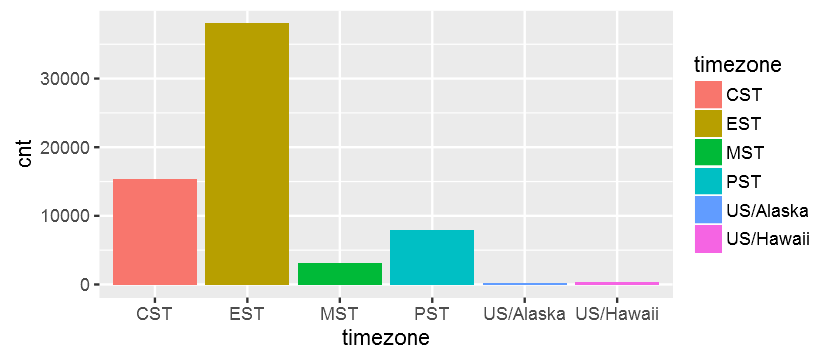

In [23]:
timezone_customer <- customer %>% group_by(timezone) %>% summarize(cnt=n())
ggplot(timezone_customer,aes(x=timezone,y=cnt,fill=timezone)) + geom_bar(stat="identity")

## 2. State 별 고객 분포

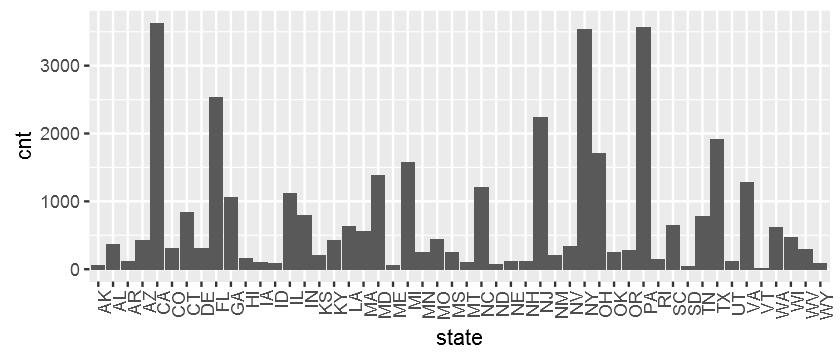

In [24]:
state_number <- v_customer %>% group_by(state) %>% summarize(cnt = sum(cnt)) %>% arrange(desc(cnt))
ggplot(v_customer, aes(x=state,y=cnt)) + geom_bar(stat="identity") + theme(axis.text.x = element_text(angle = 90, hjust = 1))

## 3. State 별 Segment 별 고객 분포

In [35]:
customer$SHOPPER_SEGMENT_CODE[is.na(customer$SHOPPER_SEGMENT_CODE)] <- 0
customer$SHOPPER_SEGMENT_CODE <- factor(customer$SHOPPER_SEGMENT_CODE)
seg_customer <- customer

In [38]:
names(seg_customer)[4] <- "CODE"

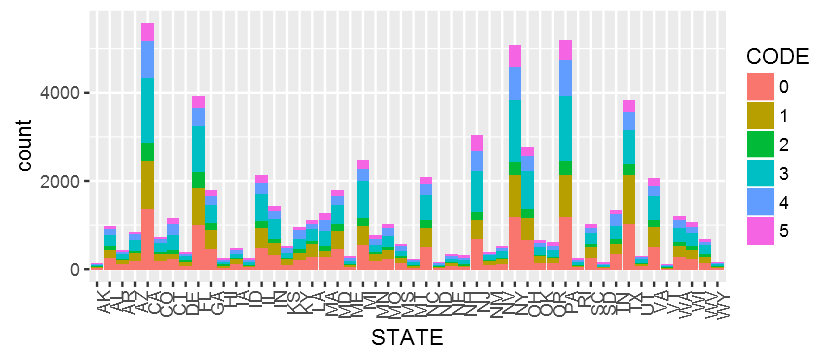

In [40]:
ggplot(seg_customer,aes(x=STATE,fill=CODE)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))